In [181]:
# params
import psycopg2
import pandas as pd
from datetime import datetime, timedelta
import warnings
import numpy as np
import pytz
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

tz = pytz.timezone('America/New_York')
da = datetime.now(tz).strftime("%Y-%m-%d")
da = '2024-10-17'
# da = '2024-09-09'
limit = 40
ti = 9

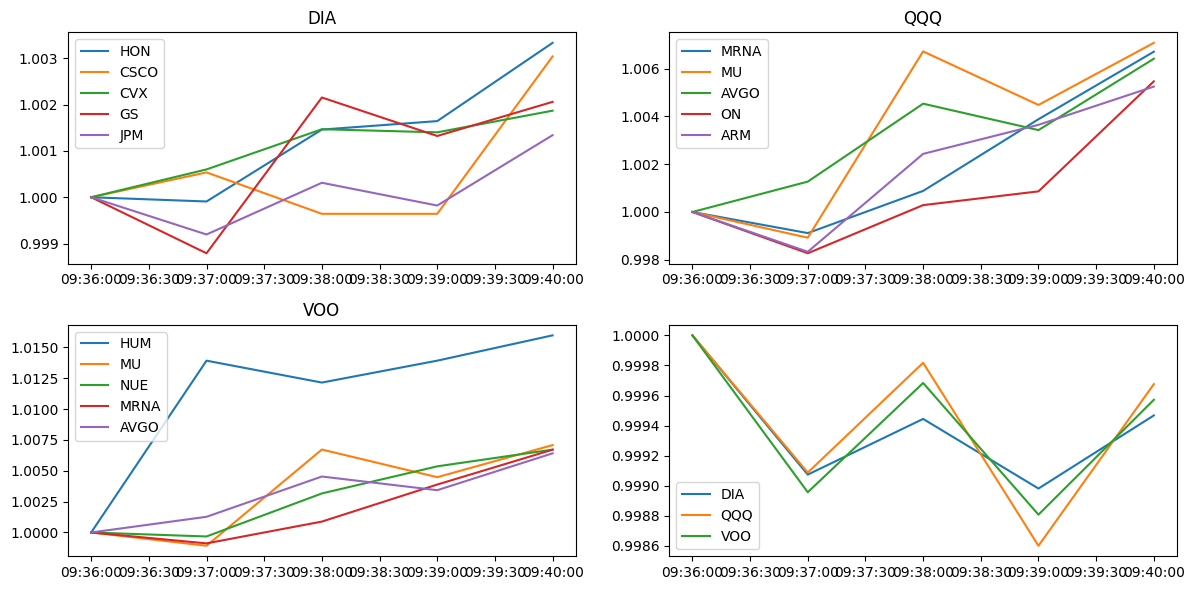

In [182]:
# combined; this only
DB_HOST = 'localhost'
DB_NAME = 'us'
DB_USER = 'postgres'
DB_PASS = 'buddyrich134'
def get_db_connection():
    conn = psycopg2.connect(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASS)
    return conn
conn = get_db_connection()
cursor = conn.cursor()

def signal_generator_30(index_name='us30', benchmark="DIA"):
    try:
        cursor.execute(f"SELECT distinct code from public.maincode where listed = '{index_name}';")
        conn.commit()
        list_ = [i[0] for i in cursor.fetchall()]

        list_str = ','.join([f"'{i}'" for i in list_]) #  and da <= '{da} {ti}:{limit}:00'
        cursor.execute(f"SELECT da, code, op from public.stock_price_5m where code in ({list_str}) and da >= '{da} 09:30:00' and da <= '{da} {ti}:{limit}:00' order by da asc;")
        conn.commit()
        res = cursor.fetchall()
        df = pd.DataFrame(res)
        df.columns = ['da','code', 'op']
        pivoted = df.pivot(columns='code', values='op', index='da')
        pivoted.ffill()

        dft = pd.DataFrame()
        dft['percent'] = np.round((pivoted.iloc[-1, :] / pivoted.iloc[0, :]) - 1, 3)
        dft['price'] = pivoted.iloc[-1, :]
        dft = dft[dft['price'] >= 50]
        dft = dft.sort_values(by='percent', ascending=False)
        if (pivoted[benchmark].iloc[-1] / pivoted[benchmark].iloc[0]) - 1 > 0:
            
            t = dft.tail()
        else:
            t = dft.head()
        return (1 + pivoted[list(t.index)].pct_change().fillna(0)).cumprod()
    except:
        return None

cursor.execute(f"SELECT da, code, op from public.stock_price_5m where code in ('VOO', 'DIA', 'QQQ') and da >= '{da} 09:30:00' and da <= '{da} {ti}:{limit}:00'order by da desc;")
conn.commit()
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ['da','code', 'op']
pivoted = df.pivot(columns='code', values='op', index='da')
pivoted.ffill()
ret = (1 + pivoted.pct_change().fillna(0)).cumprod()

fig, ax = plt.subplots(2, 2, figsize=(12, 6))
a = signal_generator_30()
ax[0, 0].plot(a, label=a.columns)
ax[0, 0].legend(a.columns)
ax[0, 0].set_title('DIA')

a = signal_generator_30('us100', 'QQQ')
ax[0, 1].plot(a, label=a.columns)
ax[0, 1].legend(a.columns)
ax[0, 1].set_title('QQQ')

a = signal_generator_30('us500', 'VOO')
ax[1, 0].plot(a, label=a.columns)
ax[1, 0].legend(a.columns)
ax[1, 0].set_title('VOO')

ax[1, 1].plot(ret, label=ret.columns)
ax[1, 1].legend(ret.columns)
plt.tight_layout()
plt.show()

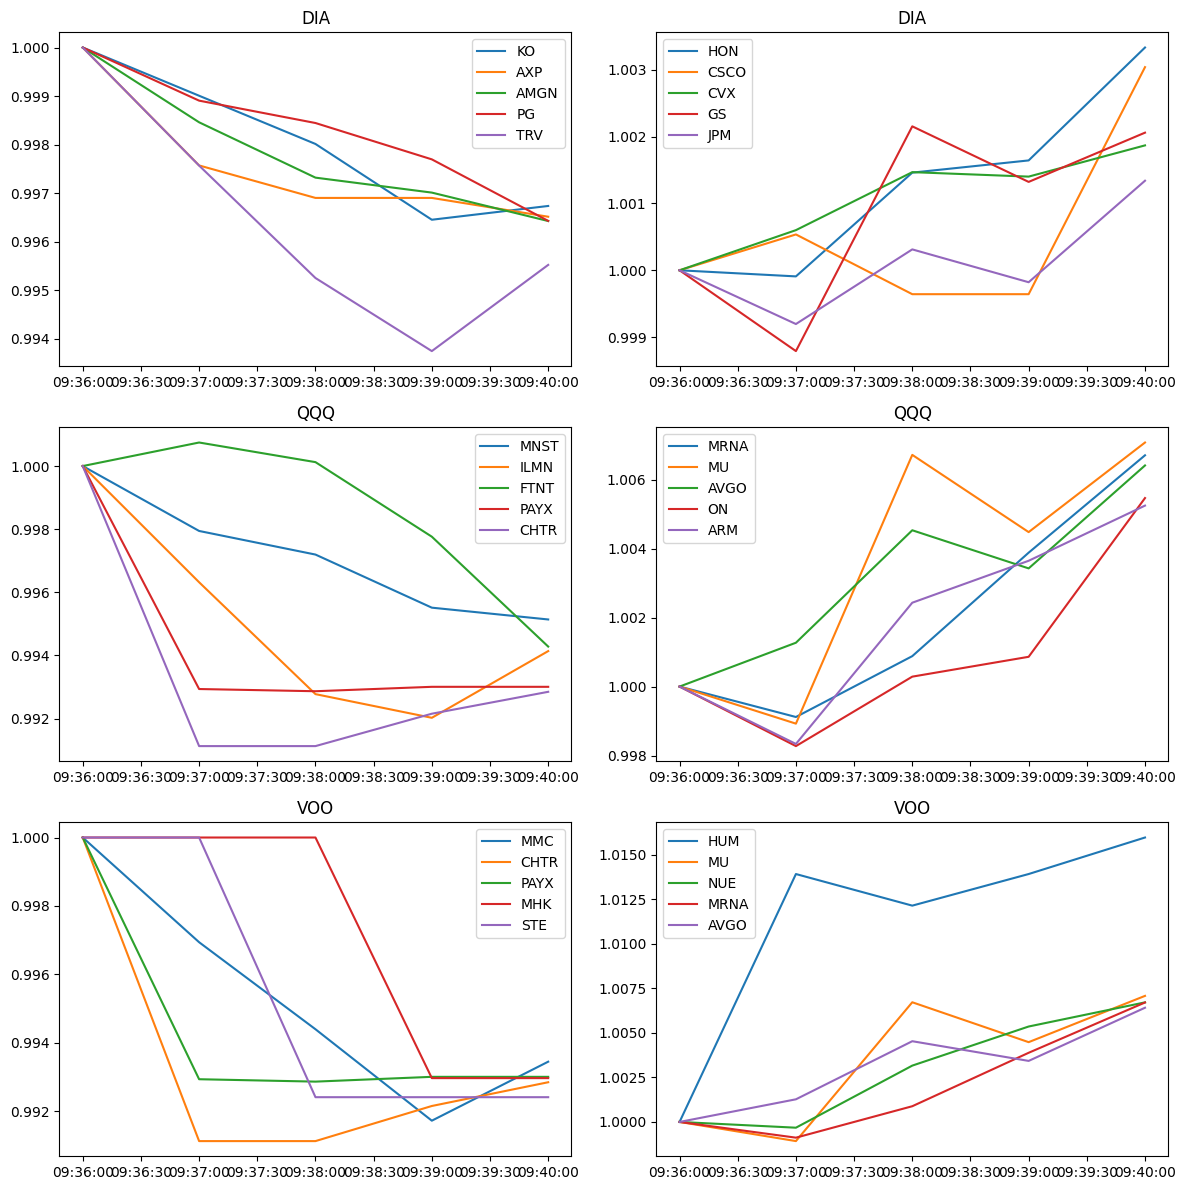

In [183]:
# combined; this only
DB_HOST = 'localhost'
DB_NAME = 'us'
DB_USER = 'postgres'
DB_PASS = 'buddyrich134'
def get_db_connection():
    conn = psycopg2.connect(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASS)
    return conn
conn = get_db_connection()
cursor = conn.cursor()

def signal_generator_30(index_name='us30', benchmark="DIA", type_='tail'):
    try:
        cursor.execute(f"SELECT distinct code from public.maincode where listed = '{index_name}';")
        conn.commit()
        list_ = [i[0] for i in cursor.fetchall()]

        list_str = ','.join([f"'{i}'" for i in list_]) #  and da <= '{da} {ti}:{limit}:00'
        cursor.execute(f"SELECT da, code, op from public.stock_price_5m where code in ({list_str}) and da >= '{da} 09:30:00' and da <= '{da} {ti}:{limit}:00' order by da asc;")
        conn.commit()
        res = cursor.fetchall()
        df = pd.DataFrame(res)
        df.columns = ['da','code', 'op']
        pivoted = df.pivot(columns='code', values='op', index='da')
        pivoted.ffill()

        dft = pd.DataFrame()
        dft['percent'] = np.round((pivoted.iloc[-1, :] / pivoted.iloc[0, :]) - 1, 3)
        dft['price'] = pivoted.iloc[-1, :]
        dft = dft[dft['price'] >= 50]
        dft = dft.sort_values(by='percent', ascending=False)
        if type_ == 'tail':
            if (pivoted[benchmark].iloc[-1] / pivoted[benchmark].iloc[0]) - 1 > 0:
                t = dft.head()
            else:
                t = dft.tail()
        elif type_ == 'head':
            if (pivoted[benchmark].iloc[-1] / pivoted[benchmark].iloc[0]) - 1 > 0:
                t = dft.tail()
            else:
                t = dft.head()
        return (1 + pivoted[list(t.index)].pct_change().fillna(0)).cumprod()
    except:
        return None

cursor.execute(f"SELECT da, code, op from public.stock_price_5m where code in ('VOO', 'DIA', 'QQQ') and da >= '{da} 09:30:00' and da <= '{da} {ti}:{limit}:00'order by da desc;")
conn.commit()
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ['da','code', 'op']
pivoted = df.pivot(columns='code', values='op', index='da')
pivoted.ffill()
ret = (1 + pivoted.pct_change().fillna(0)).cumprod()

fig, ax = plt.subplots(3, 2, figsize=(12, 12))
a = signal_generator_30(type_='tail')
ax[0, 0].plot(a, label=a.columns)
ax[0, 0].legend(a.columns)
ax[0, 0].set_title('DIA')

a = signal_generator_30(type_='head')
ax[0, 1].plot(a, label=a.columns)
ax[0, 1].legend(a.columns)
ax[0, 1].set_title('DIA')
# =====================

a = signal_generator_30('us100', 'QQQ', type_='tail')
ax[1, 0].plot(a, label=a.columns)
ax[1, 0].legend(a.columns)
ax[1, 0].set_title('QQQ')
# =====================
a = signal_generator_30('us100', 'QQQ', type_='head')
ax[1, 1].plot(a, label=a.columns)
ax[1, 1].legend(a.columns)
ax[1, 1].set_title('QQQ')
# =====================
a = signal_generator_30('us500', 'VOO', type_='tail')
ax[2, 0].plot(a, label=a.columns)
ax[2, 0].legend(a.columns)
ax[2, 0].set_title('VOO')

a = signal_generator_30('us500', 'VOO', type_='head')
ax[2, 1].plot(a, label=a.columns)
ax[2, 1].legend(a.columns)
ax[2, 1].set_title('VOO')

plt.tight_layout()
plt.show()

Gaussian Metrics:
Mean Return: 0.00046235126834670906
Standard Deviation: 0.009652943269079159
Value at Risk (95% confidence): -0.014448683458107242

Subgaussian Metrics:
Mean Return: 0.001695807279370605
Standard Deviation: 0.015592833356947468
Value at Risk (95% confidence): -0.023520610232907996


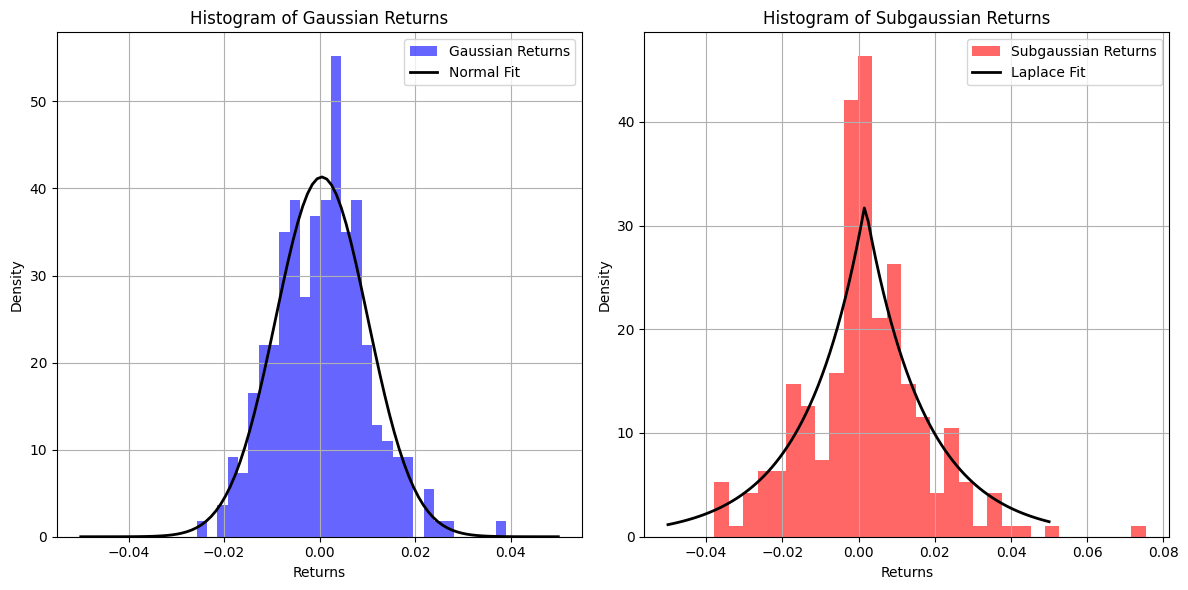

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
n_days = 252
mean_return = 0.0005
std_dev = 0.01

# Simulate returns from a Gaussian distribution
gaussian_returns = np.random.normal(loc=mean_return, scale=std_dev, size=n_days)

# Simulate returns from a Laplace distribution (subgaussian)
subgaussian_returns = np.random.laplace(loc=mean_return, scale=std_dev, size=n_days)

# Calculate prediction metrics
def calculate_metrics(returns):
    mean = np.mean(returns)
    std = np.std(returns)
    VaR_95 = np.percentile(returns, 5)
    return mean, std, VaR_95

gaussian_metrics = calculate_metrics(gaussian_returns)
subgaussian_metrics = calculate_metrics(subgaussian_returns)

# Print the metrics
print("Gaussian Metrics:")
print(f"Mean Return: {gaussian_metrics[0]}")
print(f"Standard Deviation: {gaussian_metrics[1]}")
print(f"Value at Risk (95% confidence): {gaussian_metrics[2]}")

print("\nSubgaussian Metrics:")
print(f"Mean Return: {subgaussian_metrics[0]}")
print(f"Standard Deviation: {subgaussian_metrics[1]}")
print(f"Value at Risk (95% confidence): {subgaussian_metrics[2]}")

# Visualizing the distributions
plt.figure(figsize=(12, 6))

# Histogram for Gaussian Returns
plt.subplot(1, 2, 1)
plt.hist(gaussian_returns, bins=30, density=True, alpha=0.6, color='b', label='Gaussian Returns')
x = np.linspace(-0.05, 0.05, 100)
p_gaussian = stats.norm.pdf(x, gaussian_metrics[0], gaussian_metrics[1])
plt.plot(x, p_gaussian, 'k', linewidth=2, label='Normal Fit')
plt.title('Histogram of Gaussian Returns')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Histogram for Subgaussian Returns
plt.subplot(1, 2, 2)
plt.hist(subgaussian_returns, bins=30, density=True, alpha=0.6, color='r', label='Subgaussian Returns')
p_subgaussian = stats.laplace.pdf(x, subgaussian_metrics[0], subgaussian_metrics[1])
plt.plot(x, p_subgaussian, 'k', linewidth=2, label='Laplace Fit')
plt.title('Histogram of Subgaussian Returns')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


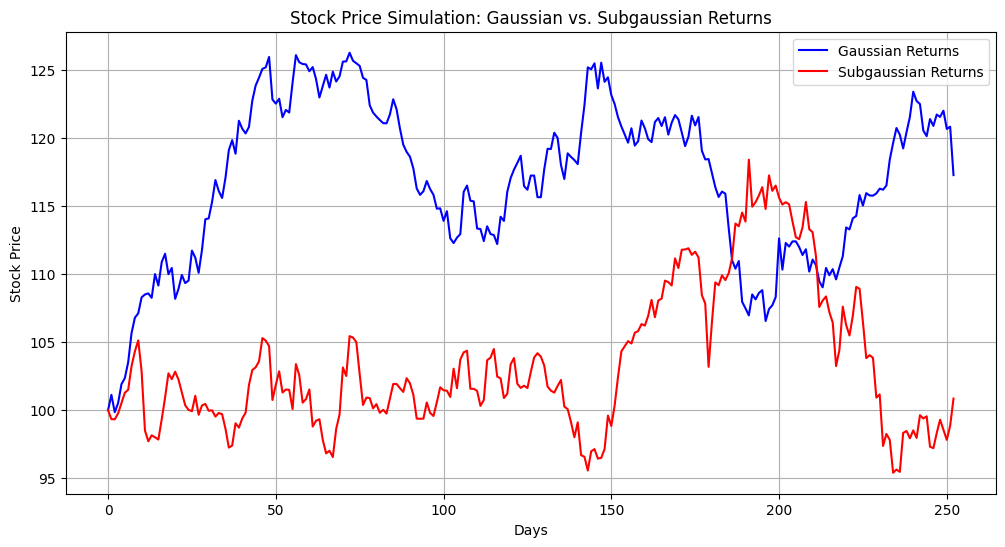

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
# np.random.seed(42)

# Simulation parameters
n_days = 252
initial_price = 100  # Starting stock price
mean_return = 0.0005
std_dev = 0.01

# Simulate returns from a Gaussian distribution
gaussian_returns = np.random.normal(loc=mean_return, scale=std_dev, size=n_days)

# Simulate returns from a Laplace distribution (subgaussian)
subgaussian_returns = np.random.laplace(loc=mean_return, scale=std_dev, size=n_days)

# Function to simulate stock prices
def simulate_stock_prices(returns, initial_price):
    prices = [initial_price]
    for r in returns:
        prices.append(prices[-1] * (1 + r))  # Price update
    return np.array(prices)

# Simulate stock prices for both distributions
gaussian_stock_prices = simulate_stock_prices(gaussian_returns, initial_price)
subgaussian_stock_prices = simulate_stock_prices(subgaussian_returns, initial_price)

# Plotting the stock price trajectories
plt.figure(figsize=(12, 6))
plt.plot(gaussian_stock_prices, label='Gaussian Returns', color='blue')
plt.plot(subgaussian_stock_prices, label='Subgaussian Returns', color='red')
plt.title('Stock Price Simulation: Gaussian vs. Subgaussian Returns')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


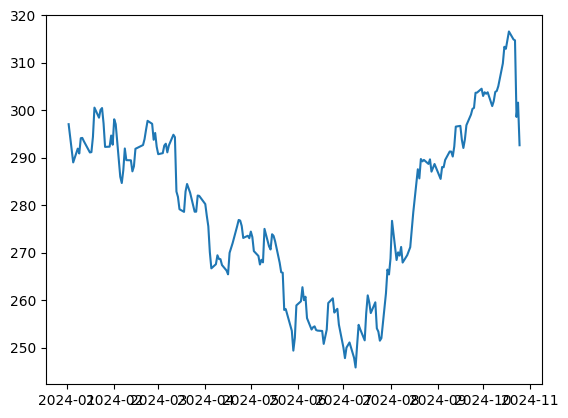

In [208]:
plt.plot(df['Close'])

[*********************100%***********************]  1 of 1 completed


np.float64(299.78603645355594)

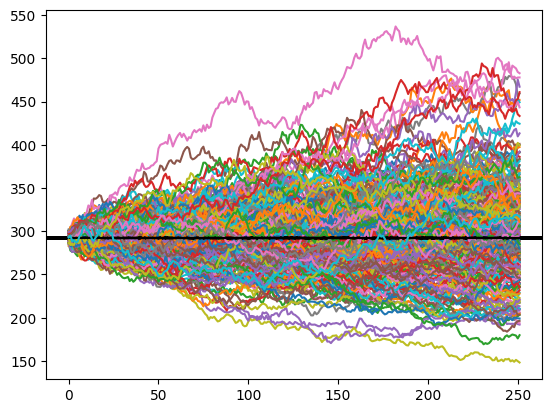

In [207]:
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
stock="TSLA"
reps=250
list_prices = []
start = datetime.datetime.now() - datetime.timedelta(days=30) # not gonna use in this case
df = yf.download("MCD", interval="1d", start='2024-01-01')
returns = np.log(1 + df['Adj Close'].pct_change())
mu, sigma = returns.mean(), returns.std()
initial = df['Adj Close'].iloc[-1]
for i in range(reps):
    sim_reps = np.random.normal(mu, sigma, 252) # for the next 252 days we're predicting
    sim_prices = initial * (sim_reps + 1).cumprod()
    plt.axhline(initial, c="k")
    plt.plot(sim_prices)
    list_prices.append(sim_prices[-1])
np.array(list_prices).mean()